In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Admission_Predict.csv',sep=',')
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df.shape

(400, 9)

In [4]:
df.columns = df.columns.str.rstrip()

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [6]:
# replace values in in Chance of Admit column by 0 or 1 based on threshold value if 0.80> 1 put 1 else put 0
df.loc[df['Chance of Admit'] >=0.80,'Chance of Admit']=1
df.loc[df['Chance of Admit'] < 0.80,'Chance of Admit']=0

In [7]:
df['Chance of Admit']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit, Length: 400, dtype: float64

In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [9]:
df=df.drop('Serial No.',axis=1)

In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1.0
396,325,107,3,3.0,3.5,9.11,1,1.0
397,330,116,4,5.0,4.5,9.45,1,1.0
398,312,103,3,3.5,4.0,8.78,0,0.0


In [11]:
X = df.iloc[:,0:7].values
y=df.iloc[:,7].values

In [12]:
y

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)


In [14]:
print(X_train.shape,end='  ')
print(X_test.shape)

(300, 7)  (100, 7)


In [49]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [50]:
matrix=confusion_matrix(y_test,y_pred,labels=[0.0,1.0])

In [51]:
matrix

array([[65,  6],
       [ 2, 27]], dtype=int64)

In [52]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree model =  ',acc)


Accuracy of Decision Tree model =   0.92


In [19]:
from sklearn.metrics import classification_report
cr =classification_report(y_test,y_pred)
print('Classification Report ', cr )

Classification Report                precision    recall  f1-score   support

         0.0       0.91      0.87      0.89        71
         1.0       0.72      0.79      0.75        29

    accuracy                           0.85       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.86      0.85      0.85       100



In [24]:
feature_names=df.columns[0:7]
print(feature_names,end=' ')
class_names=[str(x) for x in model.classes_]
class_names

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object') 

['0.0', '1.0']

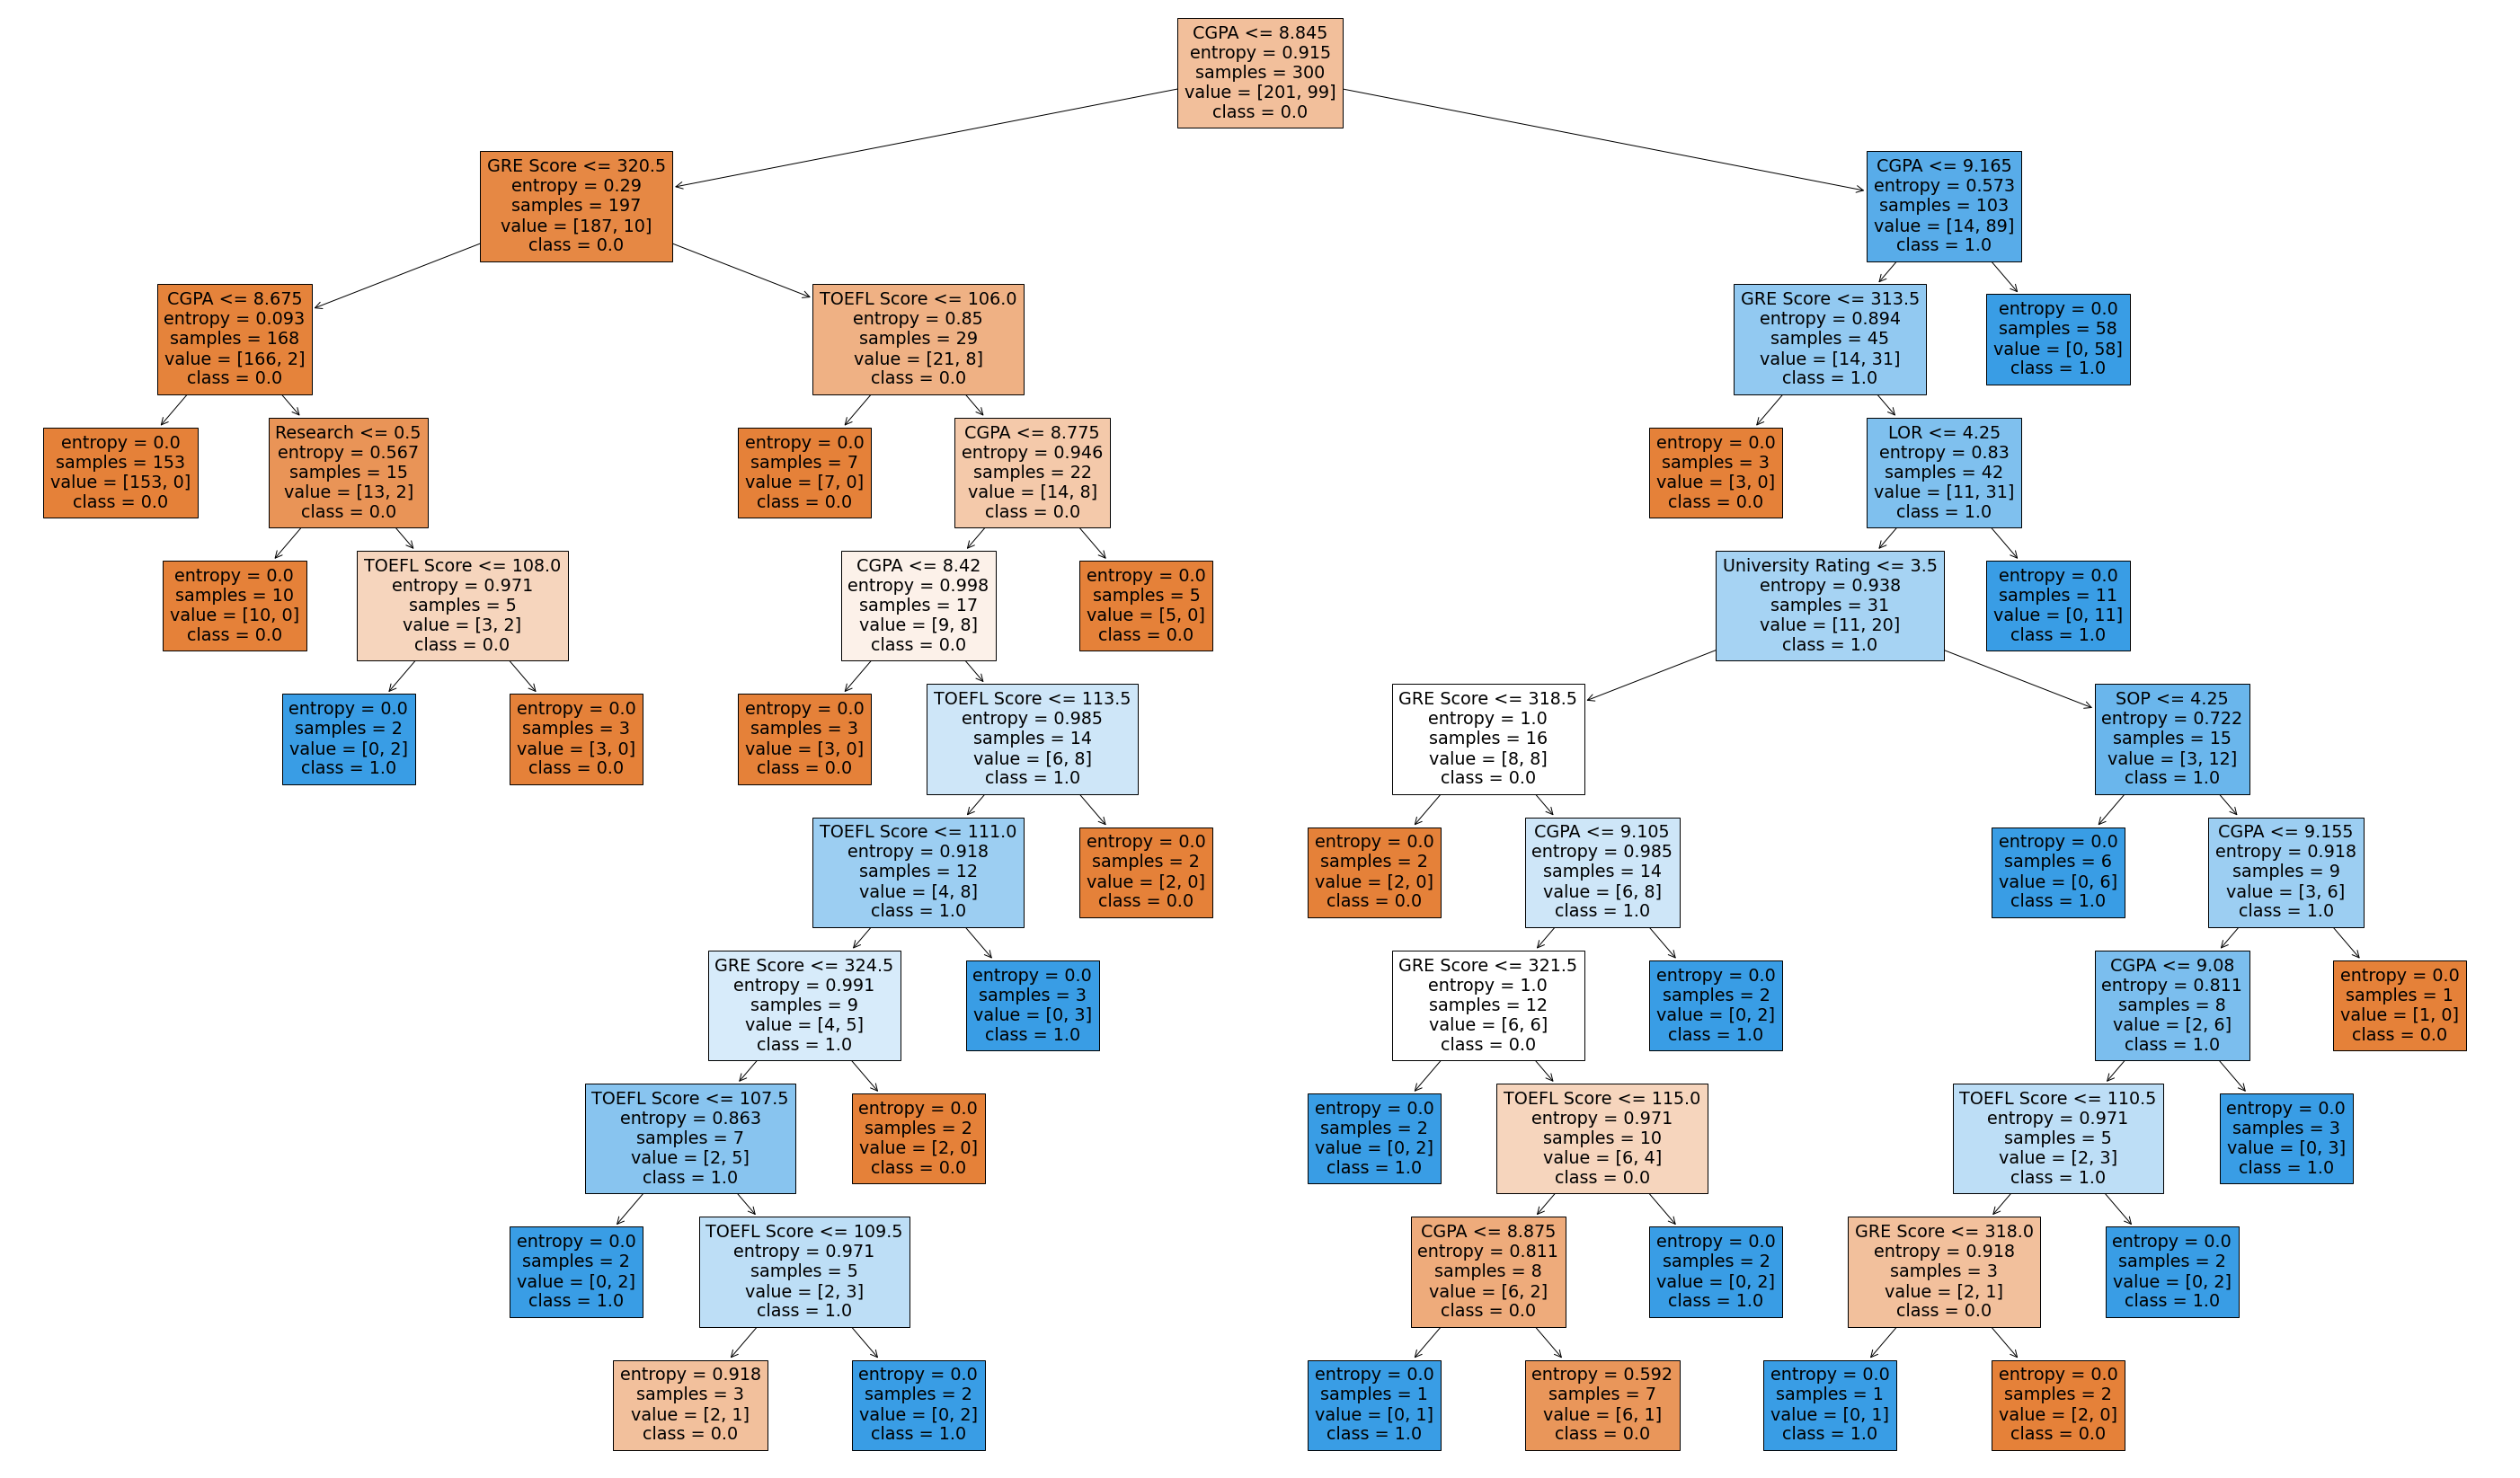

In [31]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))
plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
plt.savefig('tree_visualization.png')


In [35]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model,out_file=None, feature_names=feature_names, class_names=class_names,filled=True)
graph=graphviz.Source(dot_data,format="png")

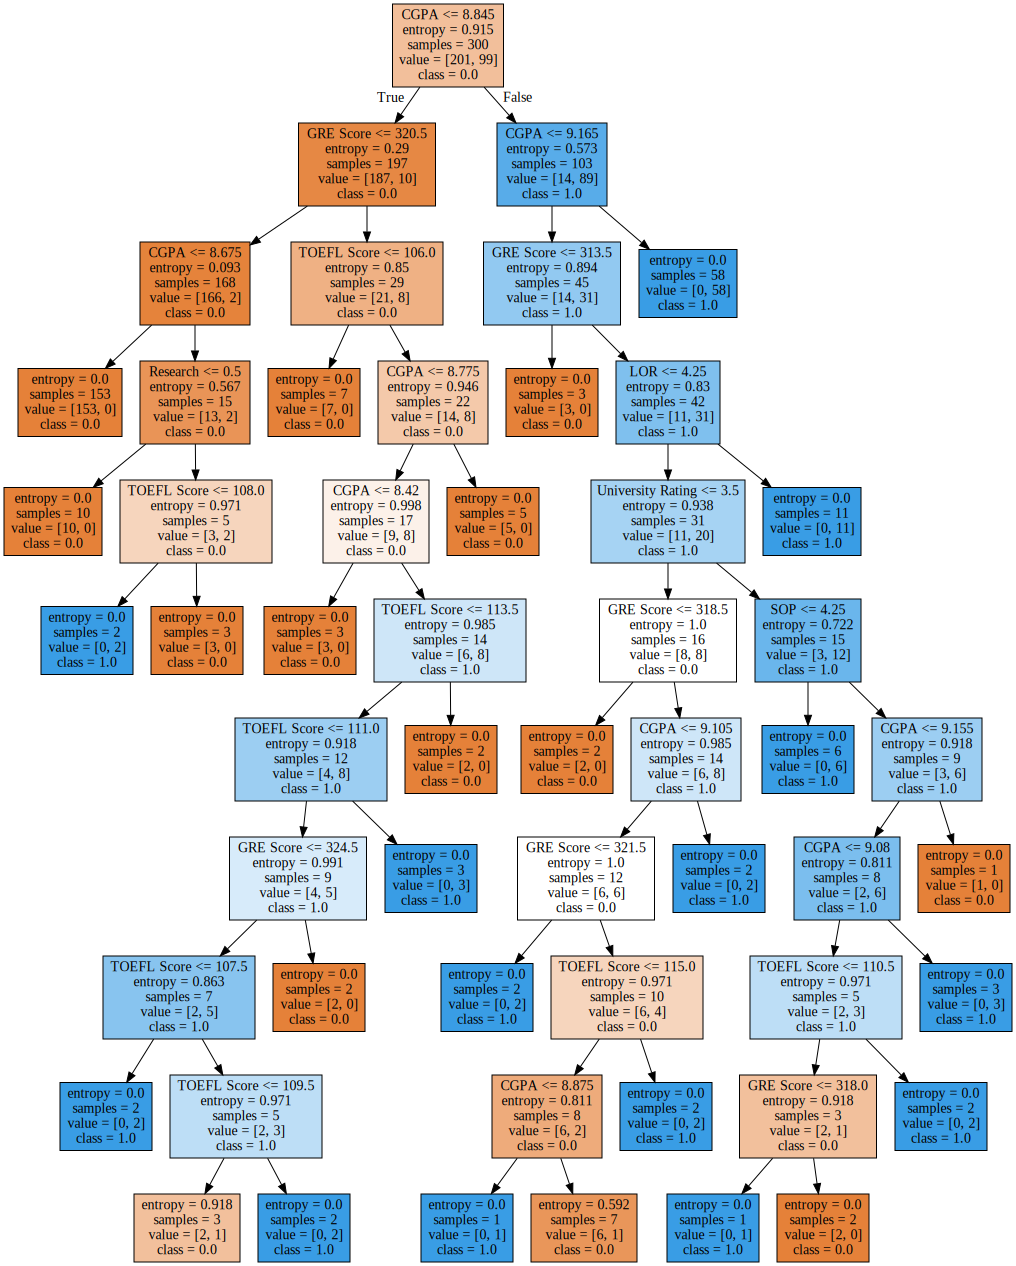

In [36]:
graph

In [57]:
sf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [72]:
depth=[1,2,3,4,5,6,7,8,9,10]

for d in depth :
    score = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),X_train,y_train,cv=sf,scoring='accuracy')
    print("Average score for depth {} is {}  :".format(d,score.mean()))

Average score for depth 1 is 0.9199999999999999  :
Average score for depth 2 is 0.9199999999999999  :
Average score for depth 3 is 0.9233333333333332  :
Average score for depth 4 is 0.9033333333333333  :
Average score for depth 5 is 0.8833333333333334  :
Average score for depth 6 is 0.9  :
Average score for depth 7 is 0.89  :
Average score for depth 8 is 0.8866666666666667  :
Average score for depth 9 is 0.9  :
Average score for depth 10 is 0.9033333333333333  :


In [71]:
score.mean()

0.8766666666666667

In [ ]:
maxdepth=[]
gini_acc=[]
entropy_acc=[]

for i in range(1,11):
    dtree=DecisionTreeClassifier(criteria='gini',max_depth=i)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(y_test,pred)
    gini_acc.append(accuracy_score(y_test,y_pred))
    maxdepth.append(i)
    